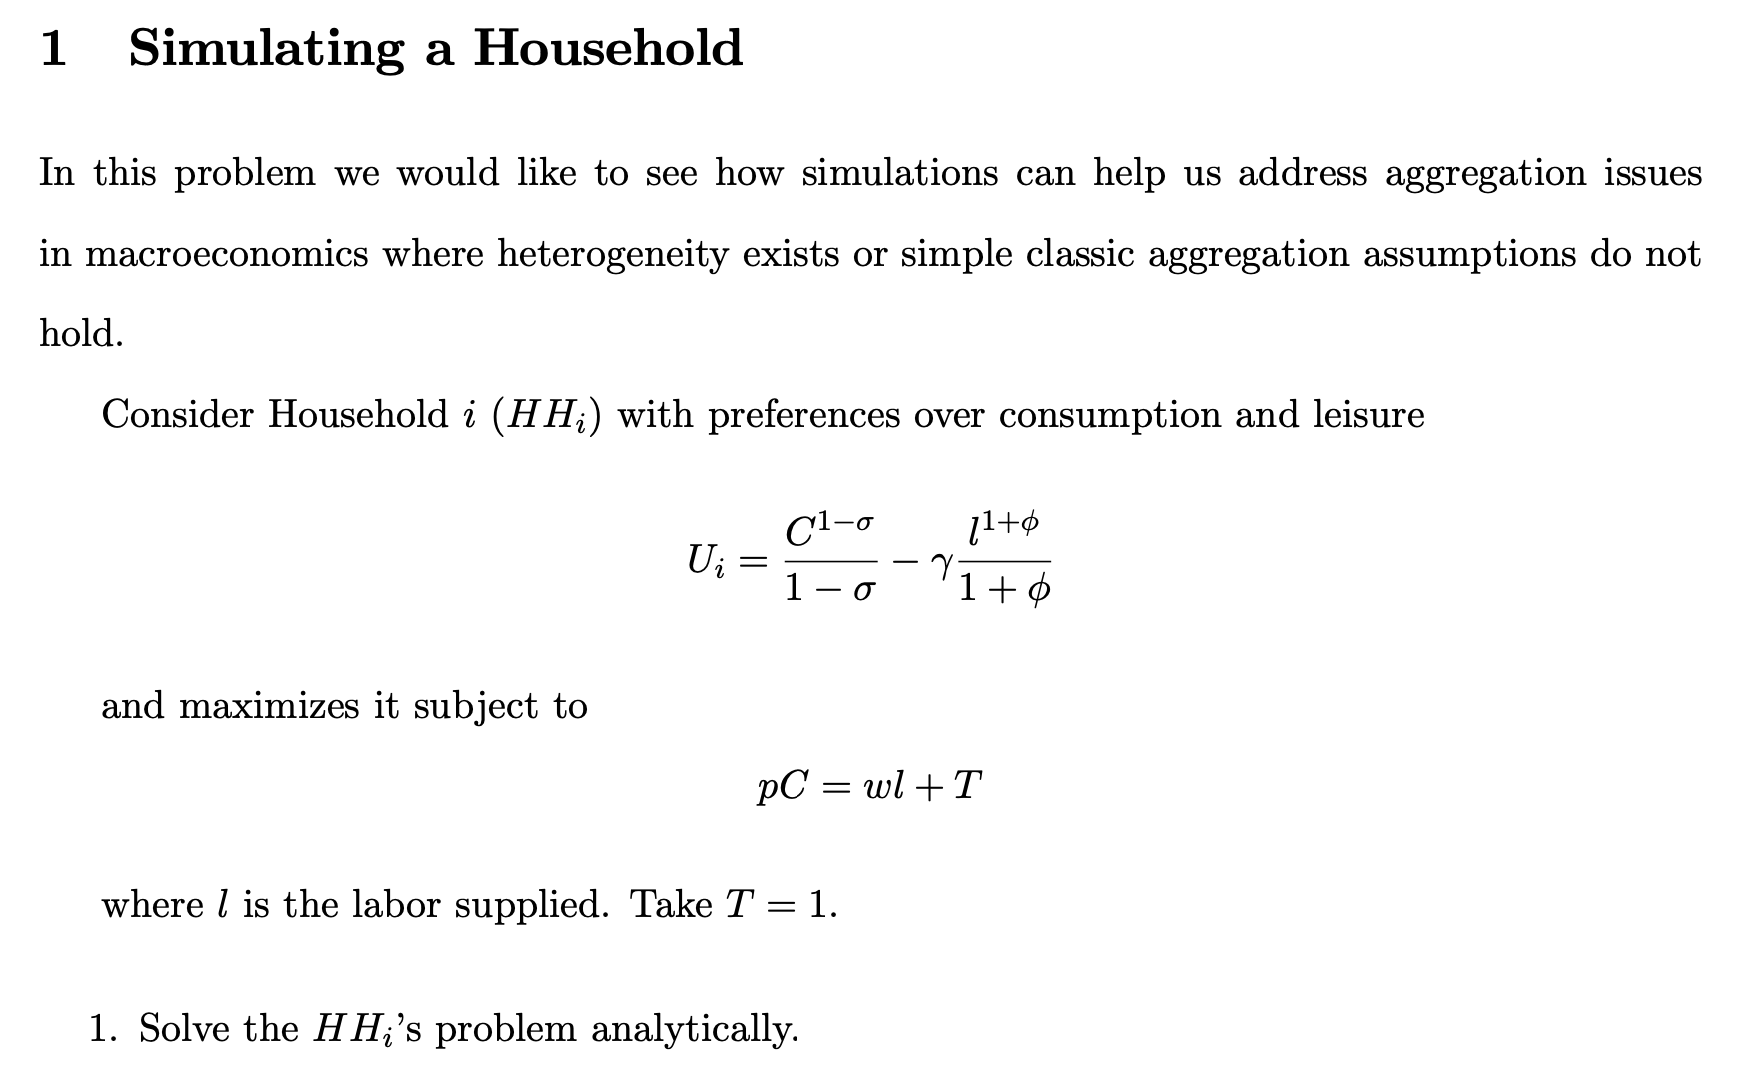

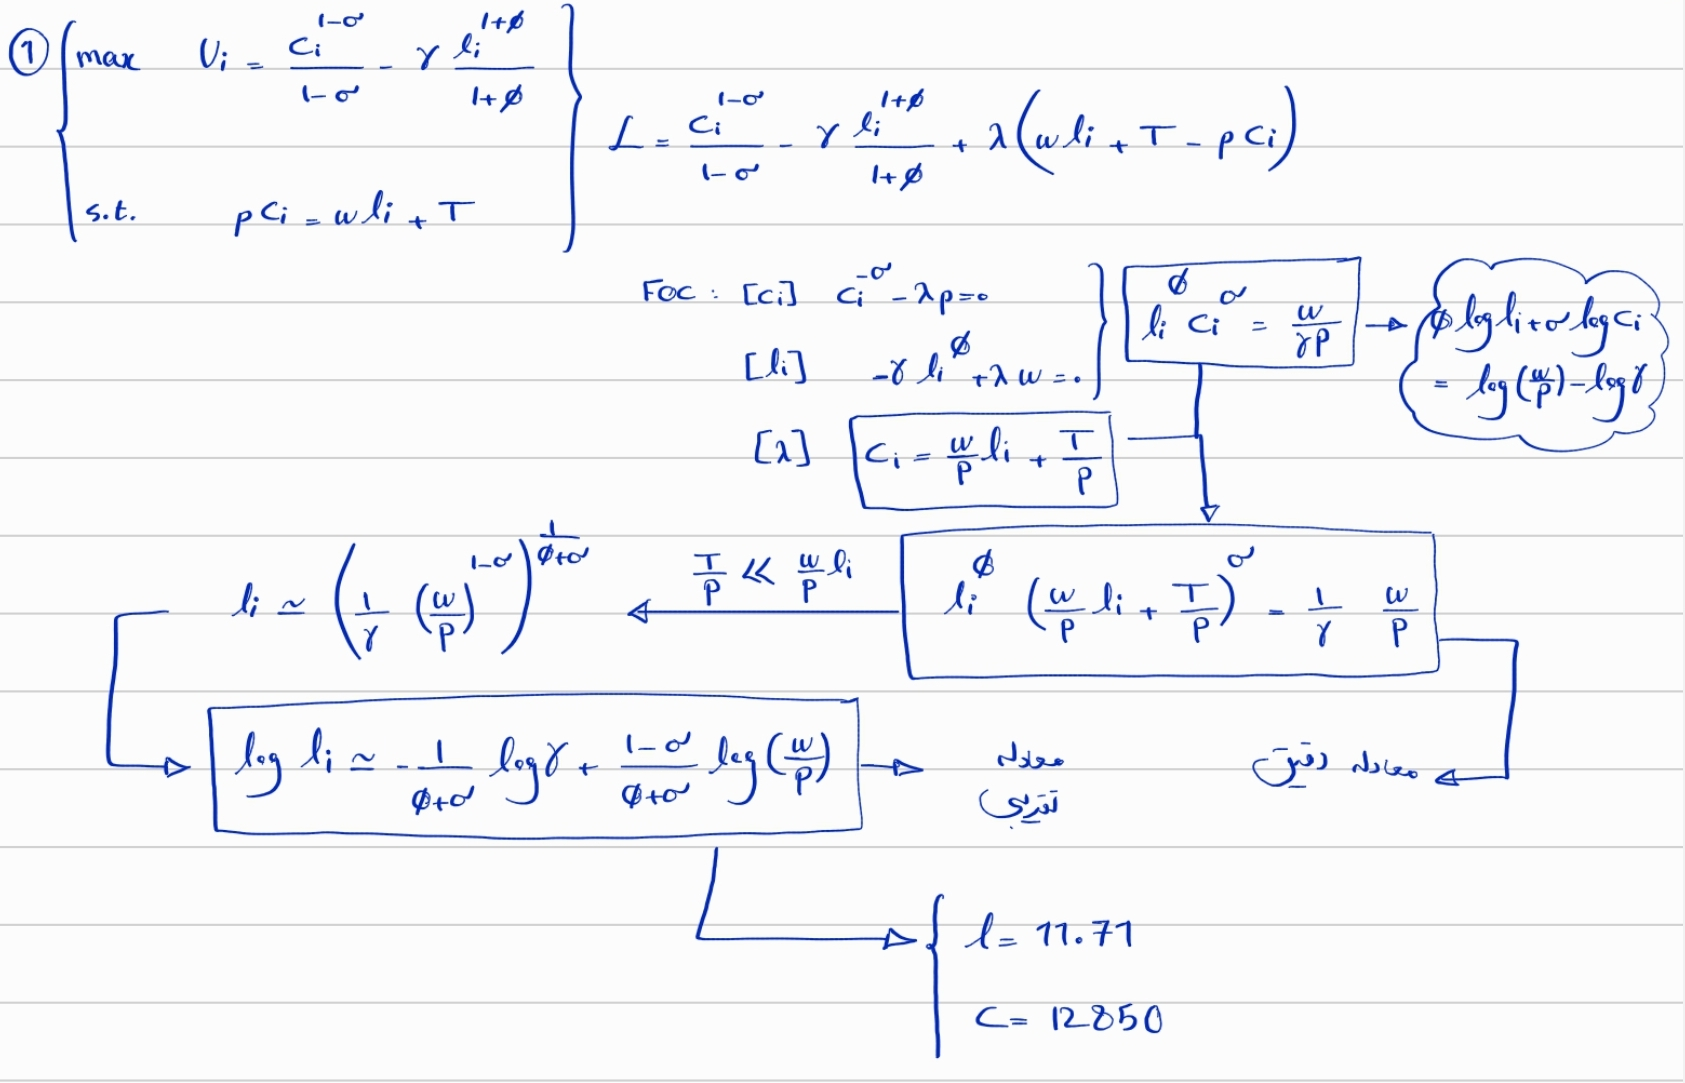

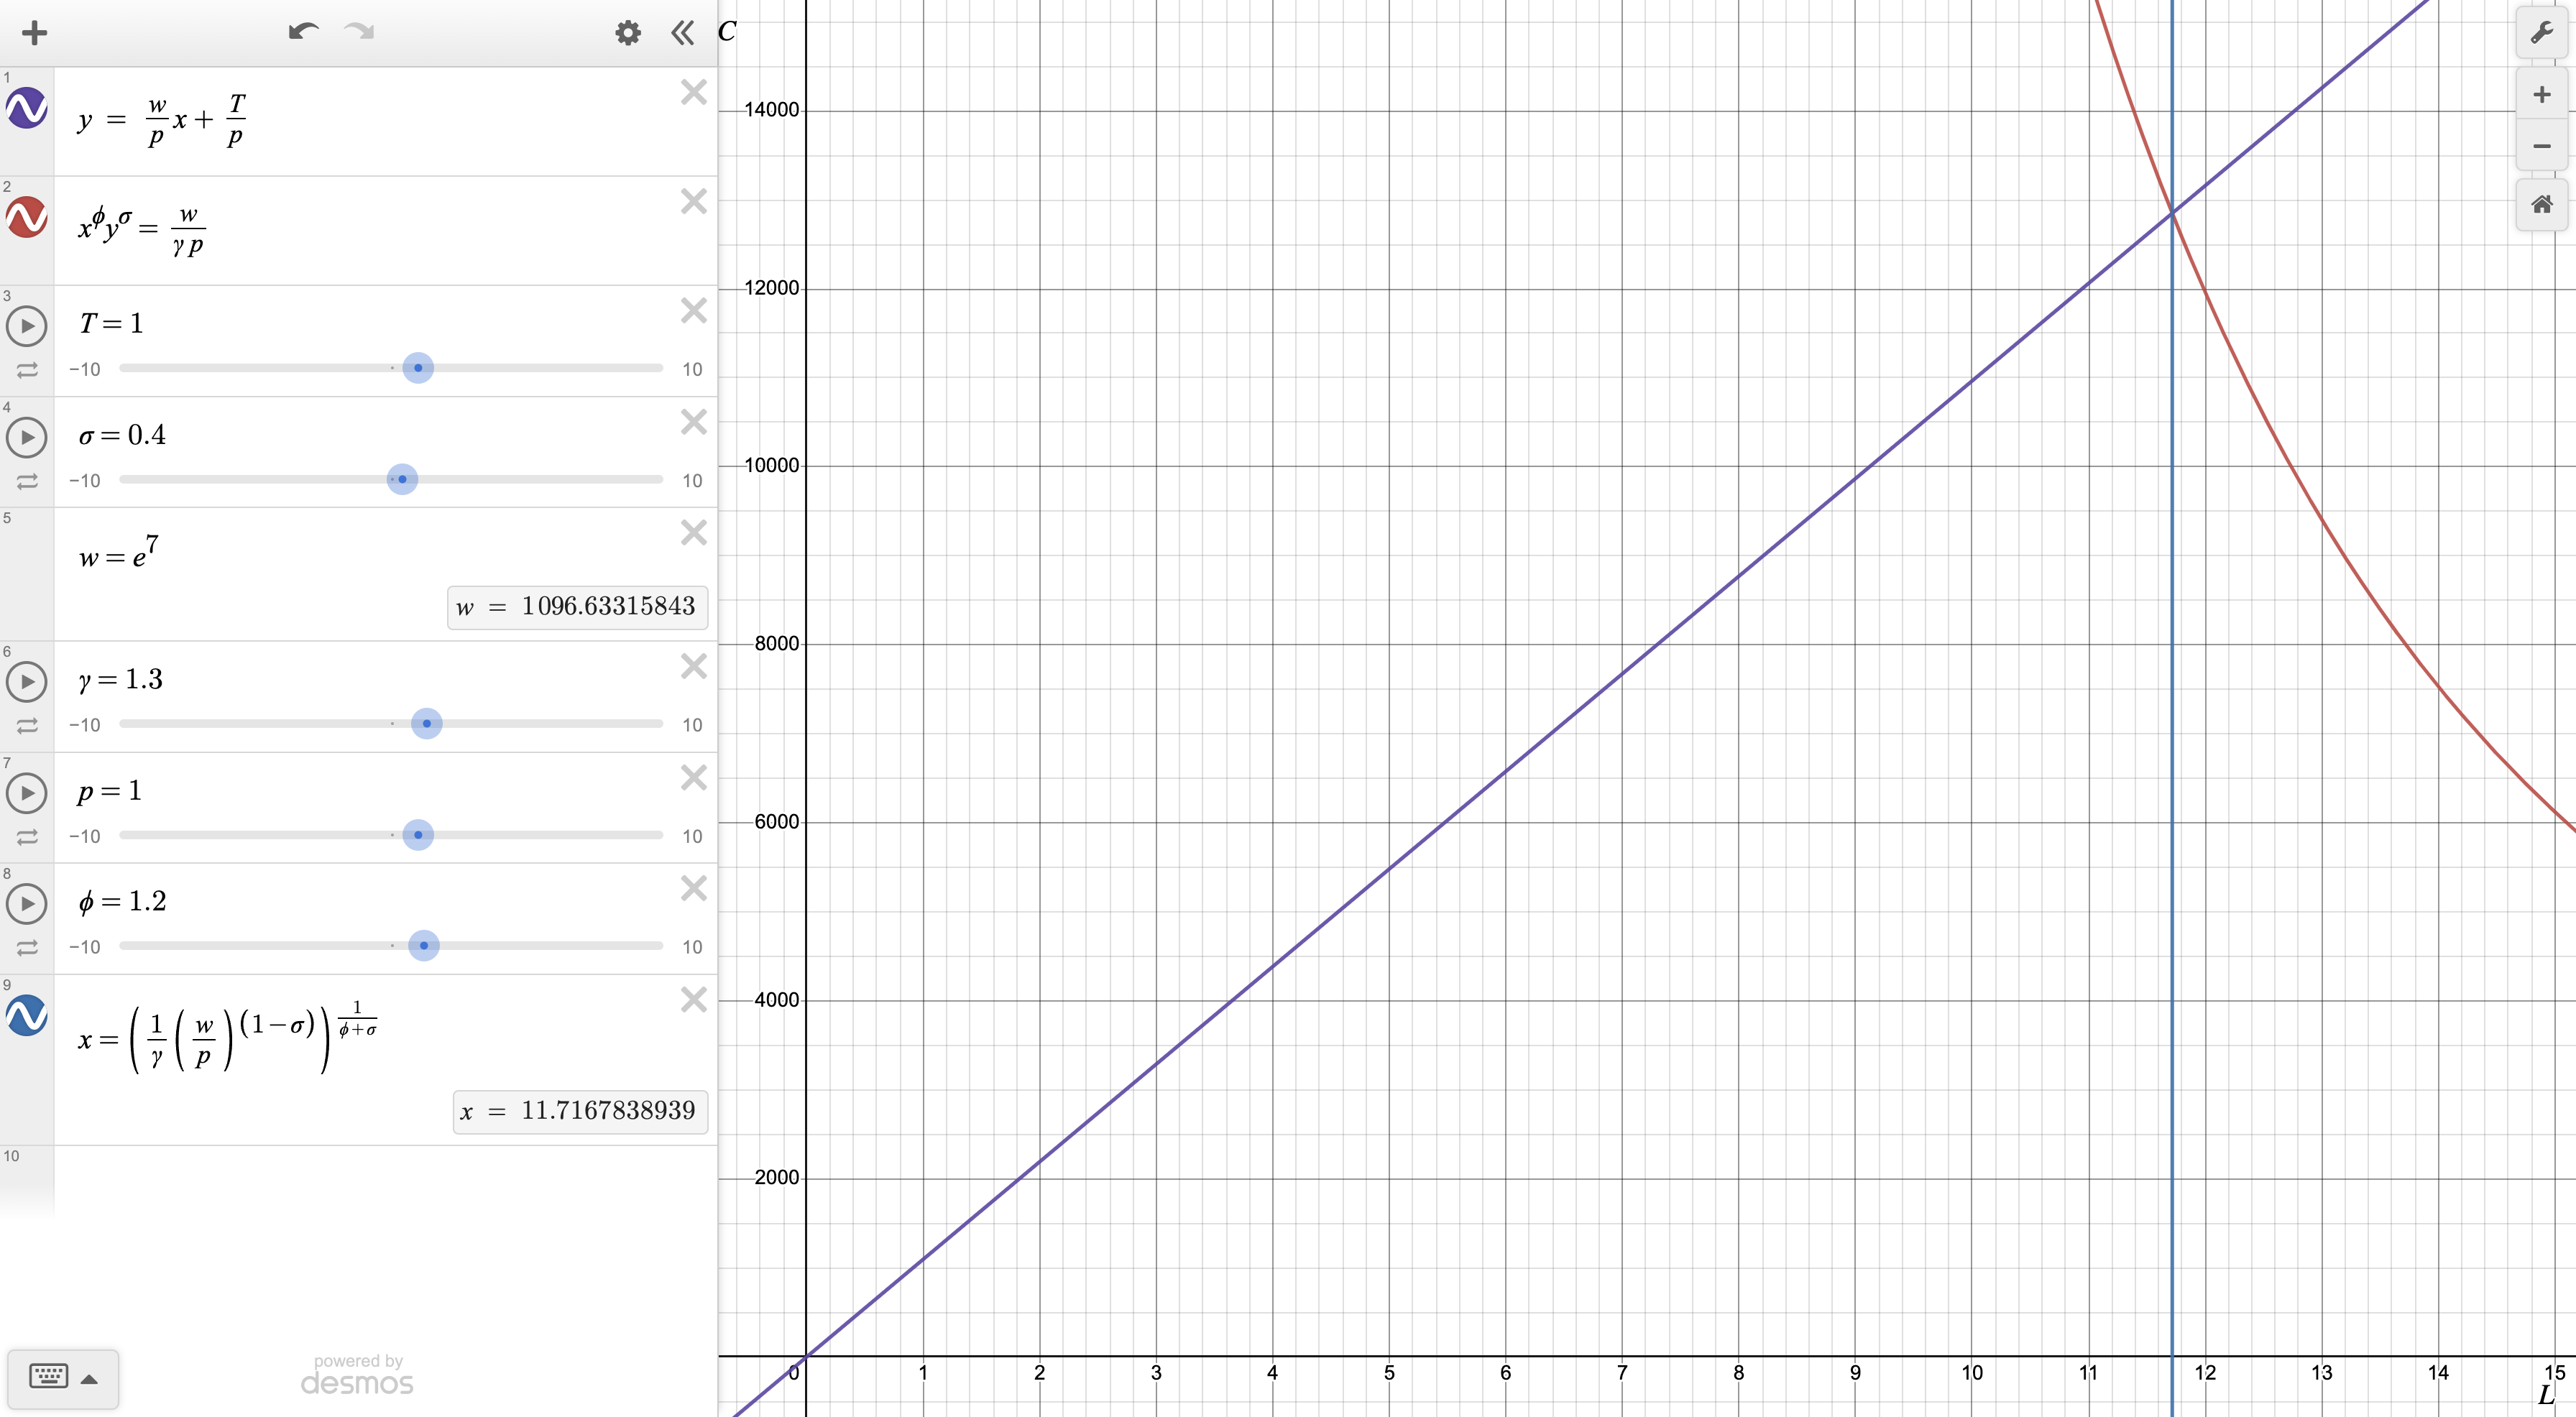

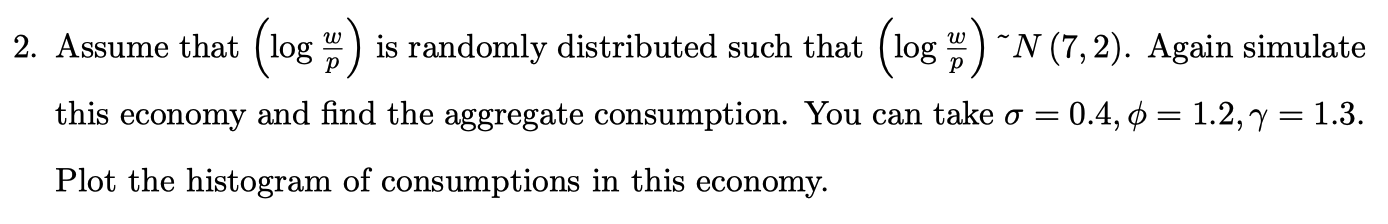

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, fsolve

In [2]:
N = 100_000
sigma = 0.4  # σ
gamma = 1.3  # γ
log_gamma = np.log(gamma)
phi = 1.2  # φ
t_p = 1

In [3]:
log_w_p = np.random.normal(loc=7, scale=2, size=N)
w_p = np.exp(log_w_p)
log_l_guess = -1 / (phi + sigma) * log_gamma + (1 - sigma) / (phi + sigma) * log_w_p
log_c_guess = (log_w_p - log_gamma - phi * log_l_guess) / sigma

In [4]:
print(np.exp(log_c_guess.mean()))

12963.611365609977


In [5]:
%%time
# Find a way instead of for loop!
l = np.zeros(shape=N, dtype=float)
l_guess = np.exp(log_l_guess)
for i in range(N):
    res = fsolve(lambda l: (l ** phi * (w_p[i] * l + t_p) ** sigma - w_p[i] / gamma), l_guess[i], xtol=1e-6)
    l[i] = res
print(l[0], l[1])

# IMPORTANT: fsolve(y) is much faster than minimize(y**2)

<timed exec>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


22.219320797320485 11.94356244178447
CPU times: user 6.3 s, sys: 325 ms, total: 6.63 s
Wall time: 6.36 s


In [6]:
%%time
def s(l_guess_i, w_p_i):
    return fsolve(lambda l: (l ** phi * (w_p_i * l + t_p) ** sigma - w_p_i / gamma), l_guess_i, xtol=1e-6)


vfunc = np.vectorize(s)
l = vfunc(l_guess, w_p)
print(l[0], l[1])

22.219320797320485 11.94356244178447
CPU times: user 6.02 s, sys: 369 ms, total: 6.39 s
Wall time: 6.08 s


In [7]:
log_l = np.log(l)
log_c = (log_w_p - log_gamma - phi * log_l) / sigma

In [8]:
print(np.exp(log_c.mean()))

12991.797824812375


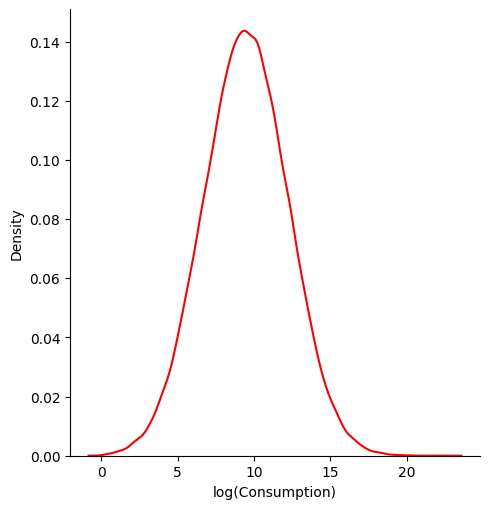

In [9]:
sns.displot(x=log_c, kind="kde", color='r')
plt.xlabel('log(Consumption)');

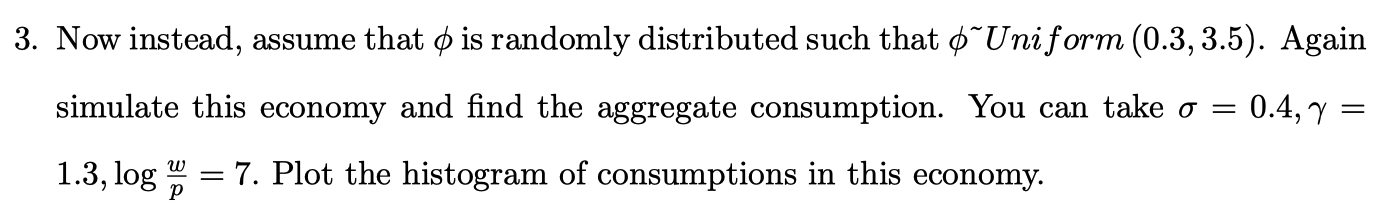

In [10]:
N = 100_000
phi = np.random.uniform(low=0.3, high=3.5, size=N)  # φ
sigma = 0.4  # σ
gamma = 1.3  # γ
log_gamma = np.log(gamma)
t_p = 1

log_w_p = 7
w_p = np.exp(log_w_p)
log_l_guess = -1 / (phi + sigma) * log_gamma + (1 - sigma) / (phi + sigma) * log_w_p
log_c_guess = (log_w_p - log_gamma - phi * log_l_guess) / sigma

In [11]:
print(np.exp(log_c_guess.mean()))

9115.380111719327


In [12]:
%%time
def s(l_guess_i, phi_i):
    return fsolve(lambda l: (l ** phi_i * (w_p * l + t_p) ** sigma - w_p / gamma), l_guess_i, xtol=1e-6)


vfunc = np.vectorize(s)
l = vfunc(l_guess, phi)
log_l = np.log(l)
log_c = (log_w_p - log_gamma - phi * log_l) / sigma

CPU times: user 10.3 s, sys: 376 ms, total: 10.7 s
Wall time: 10.3 s


In [13]:
print(np.exp(log_c.mean()))

9116.6361778471


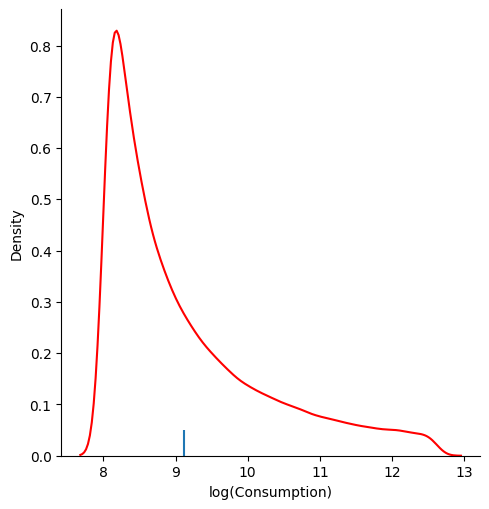

In [14]:
sns.displot(x=log_c, kind="kde", color='r')
plt.xlabel('log(Consumption)')
plt.vlines(x=log_c.mean(), ymin=0, ymax=0.05)
plt.show()

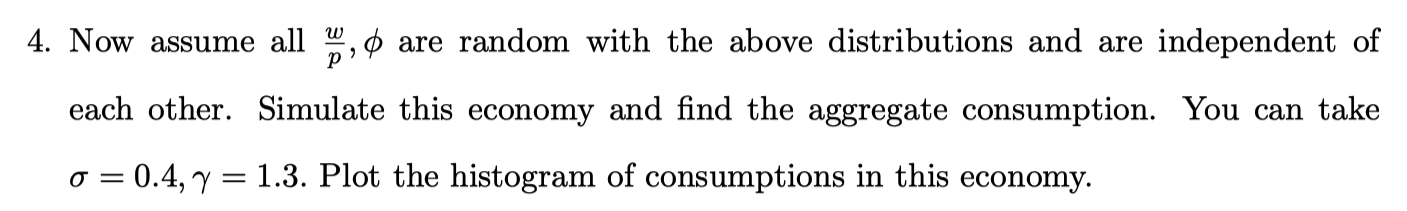

In [15]:
N = 100_000
phi = np.random.uniform(low=0.3, high=3.5, size=N)  # φ
sigma = 0.4  # σ
gamma = 1.3  # γ
log_gamma = np.log(gamma)
t_p = 1

log_w_p = np.random.normal(loc=7, scale=2, size=N)
w_p = np.exp(log_w_p)
log_l_guess = -1 / (phi + sigma) * log_gamma + (1 - sigma) / (phi + sigma) * log_w_p
log_c_guess = (log_w_p - log_gamma - phi * log_l_guess) / sigma

In [16]:
print(np.exp(log_c_guess.mean()))

9134.674269114365


In [17]:
%%time
def s(l_guess_i, phi_i, w_p_i):
    return fsolve(lambda l: (l ** phi_i * (w_p_i * l + t_p) ** sigma - w_p_i / gamma), l_guess_i, xtol=1e-6)


vfunc = np.vectorize(s)
l = vfunc(l_guess, phi, w_p)
log_l = np.log(l)
log_c = (log_w_p - log_gamma - phi * log_l) / sigma

<timed exec>:2: RuntimeWarning: invalid value encountered in power
<timed exec>:2: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


CPU times: user 9.99 s, sys: 338 ms, total: 10.3 s
Wall time: 10 s


In [18]:
print(np.exp(log_c.mean()))

9158.532428557766


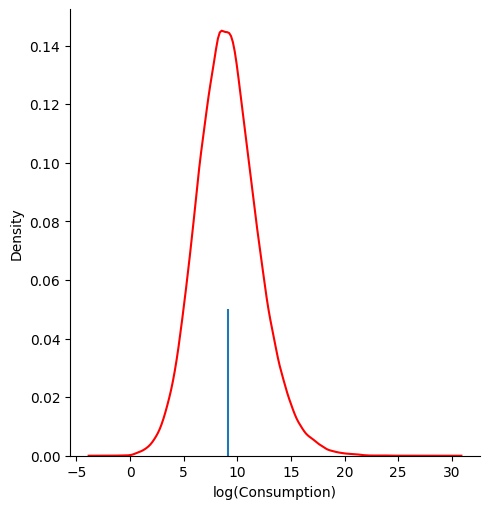

In [19]:
sns.displot(x=log_c, kind="kde", color='r')
plt.xlabel('log(Consumption)')
plt.vlines(x=log_c.mean(), ymin=0, ymax=0.05)
plt.show()

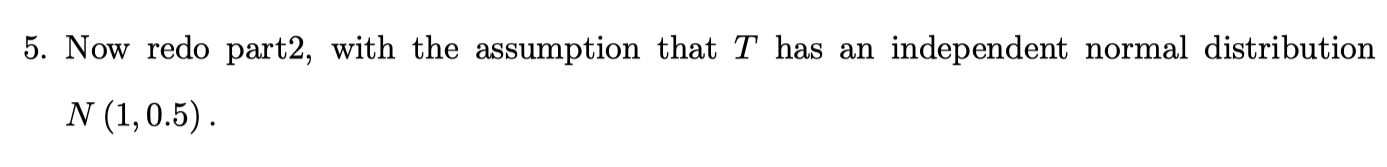

In [20]:
N = 100_000
sigma = 0.4  # σ
gamma = 1.3  # γ
log_gamma = np.log(gamma)
phi = 1.2  # φ
t_p = np.random.normal(loc=1, scale=0.5, size=N)

In [21]:
log_w_p = np.random.normal(loc=7, scale=2, size=N)
w_p = np.exp(log_w_p)
log_l_guess = -1 / (phi + sigma) * log_gamma + (1 - sigma) / (phi + sigma) * log_w_p
log_c_guess = (log_w_p - log_gamma - phi * log_l_guess) / sigma

In [22]:
print(np.exp(log_c_guess.mean()))

13046.375510954553


In [23]:
%%time
def s(l_guess_i, t_p_i, w_p_i):
    return fsolve(lambda l: (l ** phi * (w_p_i * l + t_p_i) ** sigma - w_p_i / gamma), l_guess_i, xtol=1e-6)


vfunc = np.vectorize(s)
l = vfunc(l_guess, t_p, w_p)
log_l = np.log(l)
log_c = (log_w_p - log_gamma - phi * log_l) / sigma

CPU times: user 8.24 s, sys: 203 ms, total: 8.44 s
Wall time: 8.29 s


In [24]:
print(np.exp(log_c.mean()))

13074.632783427825


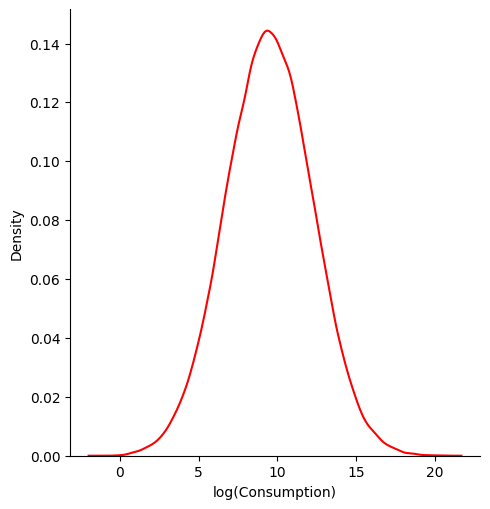

In [25]:
sns.displot(x=log_c, kind="kde", color='r')
plt.xlabel('log(Consumption)');